## **Import libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [2]:
import gdown
url = 'https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P'
output = '/content/dataset.zip'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
To: /content/dataset.zip
100%|██████████| 65.7M/65.7M [00:02<00:00, 30.6MB/s]


'/content/dataset.zip'

In [3]:
! unzip dataset.zip


Archive:  dataset.zip
   creating: no/
  inflating: no/no0.jpg              
  inflating: no/no1.jpg              
  inflating: no/no10.jpg             
  inflating: no/no100.jpg            
  inflating: no/no1000.jpg           
  inflating: no/no1001.jpg           
  inflating: no/no1002.jpg           
  inflating: no/no1003.jpg           
  inflating: no/no1004.jpg           
  inflating: no/no1005.jpg           
  inflating: no/no1006.jpg           
  inflating: no/no1007.jpg           
  inflating: no/no1008.jpg           
  inflating: no/no1009.jpg           
  inflating: no/no101.jpg            
  inflating: no/no1010.jpg           
  inflating: no/no1011.jpg           
  inflating: no/no1012.jpg           
  inflating: no/no1013.jpg           
  inflating: no/no1014.jpg           
  inflating: no/no1015.jpg           
  inflating: no/no1016.jpg           
  inflating: no/no1017.jpg           
  inflating: no/no1018.jpg           
  inflating: no/no1019.jpg           
  inflating

In [4]:
! rm dataset.zip
! rm sample_data -r -f

## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [5]:
ds_train, ds_test = keras.utils.image_dataset_from_directory(
    '/content/',
    labels="inferred",
    label_mode="binary",
    class_names=['yes', 'no'],
    color_mode="grayscale",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=27,
    validation_split=0.2,
    subset='both',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Using 600 files for validation.


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with.

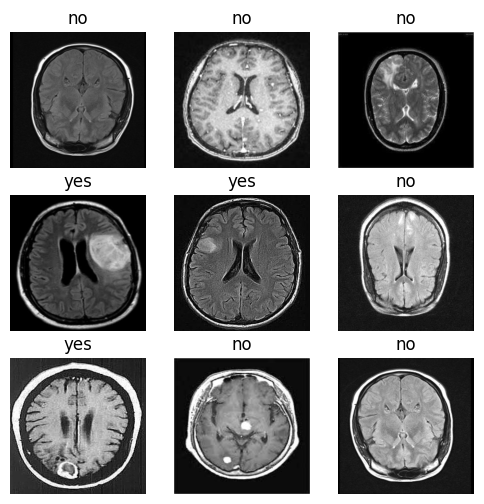

In [6]:
classes = ['yes', 'no']

some_samples = ds_train.take(1)
iterator = some_samples.as_numpy_iterator()
images, labels = next(iterator)
fig = plt.figure(figsize=(6, 6))
for i in range(9):
  image, label = images[i], labels[i]
  fig.add_subplot(3, 3, i+1)
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.title(classes[int(label[0])])


## **Build the models**

In this section you will build the model with two approaches.
First you should build it with the Sequential API and then you have to work with the Functional API in the second part.

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## **1.Sequential API**

### **Build a model**

In [7]:
model = tf.keras.Sequential([
    Input(shape=(256, 256, 1)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### **Train the model**

In [10]:
history = model.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test
)

Epoch 1/20
75/75 [==============================] - 17s 71ms/step - loss: 6.3314 - accuracy: 0.6142 - val_loss: 0.5693 - val_accuracy: 0.7500
Epoch 2/20
75/75 [==============================] - 4s 46ms/step - loss: 0.5273 - accuracy: 0.7875 - val_loss: 0.4890 - val_accuracy: 0.8100
Epoch 3/20
75/75 [==============================] - 5s 59ms/step - loss: 0.4523 - accuracy: 0.8521 - val_loss: 0.4553 - val_accuracy: 0.8317
Epoch 4/20
75/75 [==============================] - 4s 45ms/step - loss: 0.4149 - accuracy: 0.8838 - val_loss: 0.4029 - val_accuracy: 0.8783
Epoch 5/20
75/75 [==============================] - 4s 46ms/step - loss: 0.3871 - accuracy: 0.8954 - val_loss: 0.3902 - val_accuracy: 0.8967
Epoch 6/20
75/75 [==============================] - 5s 60ms/step - loss: 0.3638 - accuracy: 0.9054 - val_loss: 0.3741 - val_accuracy: 0.8933
Epoch 7/20
75/75 [==============================] - 4s 44ms/step - loss: 0.3444 - accuracy: 0.9125 - val_loss: 0.4467 - val_accuracy: 0.8700
Epoch 8/20
7

### **Test the model**

In [11]:
score = model.evaluate(ds_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

19/19 [==============================] - 1s 31ms/step - loss: 0.2072 - accuracy: 0.9583
Test loss: 0.20715492963790894
Test accuracy: 0.9583333134651184


1/1 [==============================] - 0s 101ms/step


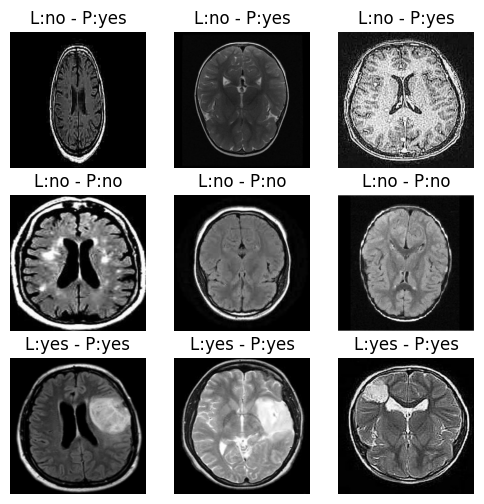

In [12]:
classes = ['yes', 'no']

some_samples = ds_train.take(1)
iterator = some_samples.as_numpy_iterator()
images, labels = next(iterator)
predictions = model.predict(images)
fig = plt.figure(figsize=(6, 6))
for i in range(9):
  image, label, predict = images[i], labels[i], predictions[i]
  fig.add_subplot(3, 3, i+1)
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.title(f'L:{classes[int(label[0])]} - P:{classes[int(predict[0])]}')

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

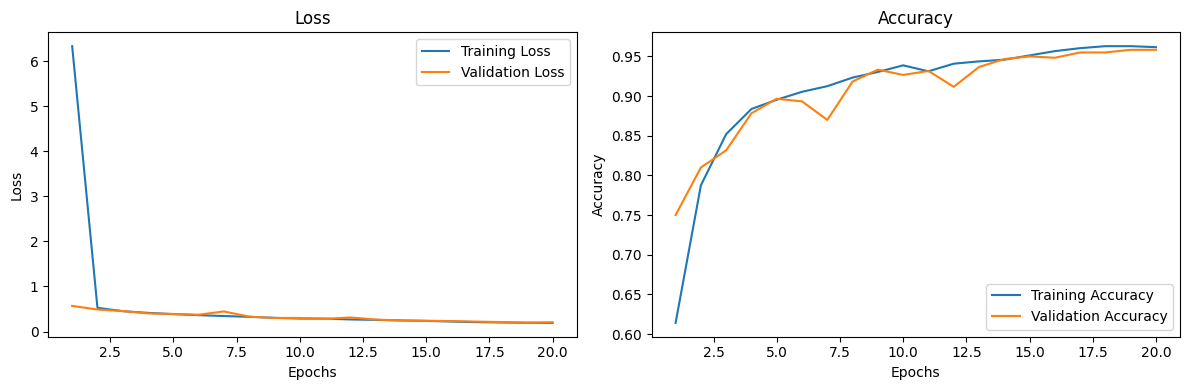

In [13]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## **2.Functional API**

### **Build a model**

In [14]:
inputs = tf.keras.Input(shape=(256, 256, 1))
x = Conv2D(16, (3, 3), activation='relu')(inputs)
x = MaxPool2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPool2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### **Train the model**

In [16]:
history = model.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test
)

Epoch 1/20
75/75 [==============================] - 7s 69ms/step - loss: 6.6883 - accuracy: 0.8008 - val_loss: 0.1815 - val_accuracy: 0.9383
Epoch 2/20
75/75 [==============================] - 4s 45ms/step - loss: 0.1159 - accuracy: 0.9563 - val_loss: 0.0802 - val_accuracy: 0.9733
Epoch 3/20
75/75 [==============================] - 4s 46ms/step - loss: 0.0400 - accuracy: 0.9875 - val_loss: 0.0932 - val_accuracy: 0.9683
Epoch 4/20
75/75 [==============================] - 6s 71ms/step - loss: 0.0133 - accuracy: 0.9979 - val_loss: 0.0549 - val_accuracy: 0.9800
Epoch 5/20
75/75 [==============================] - 4s 48ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0535 - val_accuracy: 0.9817
Epoch 6/20
75/75 [==============================] - 4s 45ms/step - loss: 9.1442e-04 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9833
Epoch 7/20
75/75 [==============================] - 4s 49ms/step - loss: 5.3748e-04 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 0.9833
Epoch

### **Test the model**

In [17]:
score = model.evaluate(ds_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

19/19 [==============================] - 1s 44ms/step - loss: 0.0503 - accuracy: 0.9817
Test loss: 0.05027418211102486
Test accuracy: 0.9816666841506958


1/1 [==============================] - 0s 74ms/step


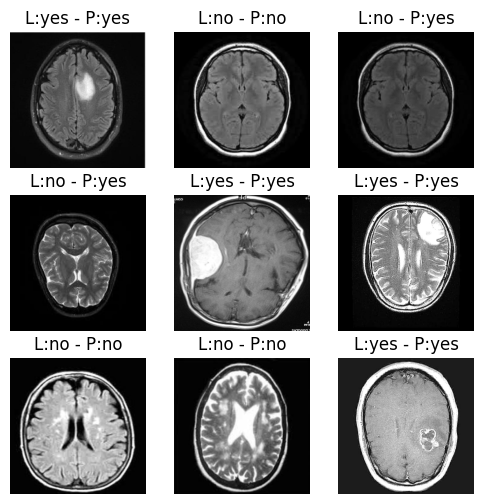

In [18]:
classes = ['yes', 'no']

some_samples = ds_train.take(1)
iterator = some_samples.as_numpy_iterator()
images, labels = next(iterator)
predictions = model.predict(images)
fig = plt.figure(figsize=(6, 6))
for i in range(9):
  image, label, predict = images[i], labels[i], predictions[i]
  fig.add_subplot(3, 3, i+1)
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.title(f'L:{classes[int(label[0])]} - P:{classes[int(predict[0])]}')

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

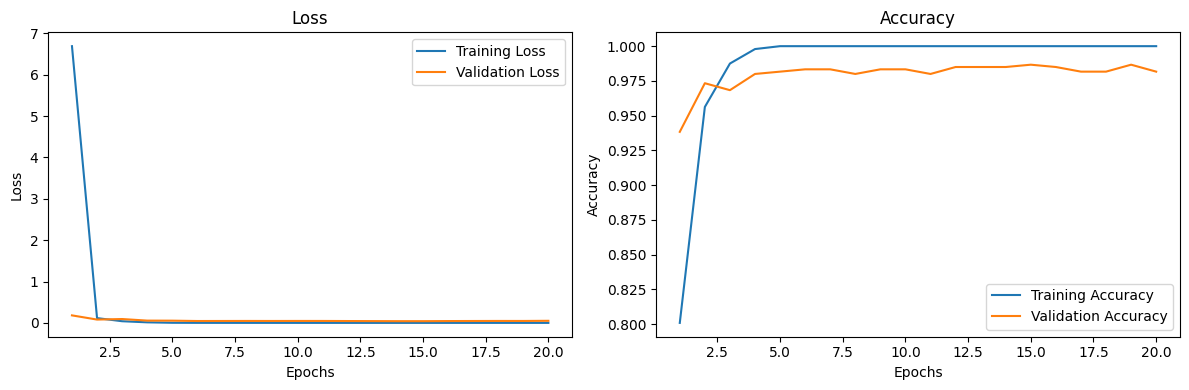

In [20]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()